In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [ ]:
dataset = pd.read_csv('Dataset/train.csv', encoding = 'latin1')

In [ ]:
dataset.head(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


## **Data Information & Statistical Summary**

In [ ]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

(27481, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None
       Population -2020  Land Area (Km²)  Density (P/Km²)
count      2.748100e+04     2.748100e+04     27481.000000
mean       4.018497e+07     6.621730e+05       357.686583
std        1.504946e+08     1.807425e+06      2013.750702
min        8.010

**Checking Missing Values**

<Axes: >

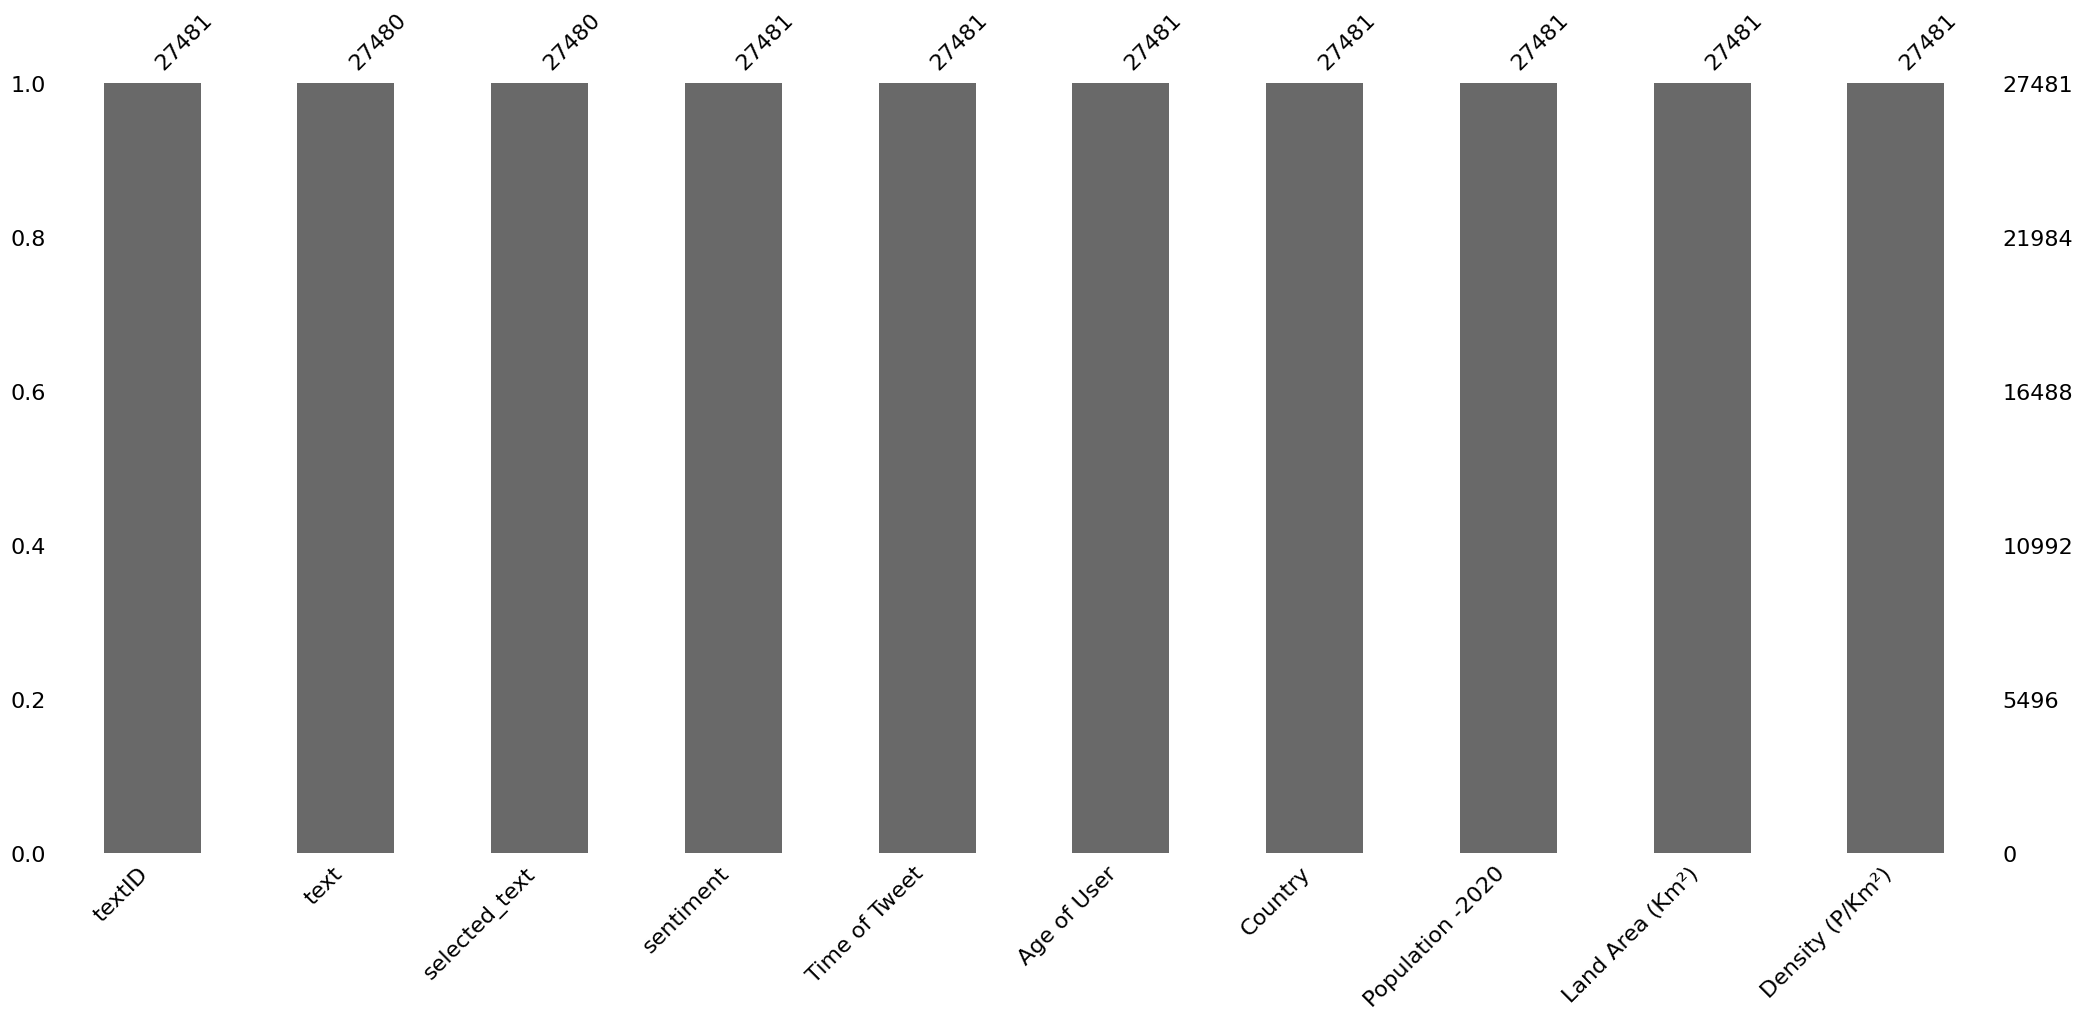

In [ ]:
msno.bar(dataset)

**Observation:** We can see from above bar graph we have one value missing in text and selected_text column(each). We will see this column first and will drop it.

**Checking Null record**

In [ ]:
null_rows = dataset[dataset.isnull().any(axis=1)]
null_rows

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
314,fdb77c3752,NaN,NaN,neutral,night,31-45,Namibia,2540905,823000.0,3


In [ ]:
#drop row contains null value
dataset = dataset.drop(314, axis = 0)

## **Feature Engineering & Exploratory Data Analysis**

In [ ]:
categorical_cols=dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Columns in the dataset:")
print(categorical_cols)
print("Numerical Columns in the dataset:")
print(numerical_cols)

Categorical Columns in the dataset:
Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country'],
      dtype='object')
Numerical Columns in the dataset:
['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']


We are droping the columns initially those are not relevant for our EDA, model and predictions<br>
1. textID
2. Population -2020
3. Land Area (Km$^{2}$)
4. Density (P/Km$^{2}$)

In [ ]:
dataset = dataset.drop(['textID', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'] , axis = 1)
dataset.head(5)

,text,selected_text,sentiment,Time of Tweet,Age of User,Country
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania
2,my boss is bullying me...,bullying me,negative,night,31-45,Algeria
3,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola


**Sentiment**

In [ ]:
unique_sentiments = dataset['sentiment'].value_counts();
print(unique_sentiments)

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64


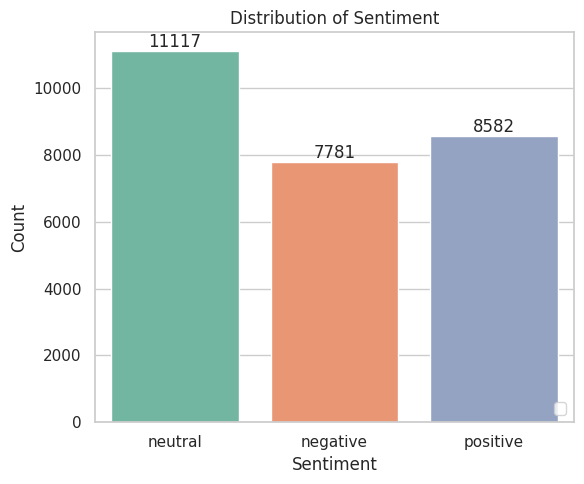

In [ ]:
def distribution_graph(x, hues, column_name):

    unique_values = x.nunique()
    plot_width = min(max(unique_values * 0.5, 6), 15)  # Adjust width dynamically
    plot_height = min(max(unique_values * 0.4, 5), 10)  # Adjust height dynamically

    plt.figure(figsize=(plot_width, plot_height))
    sns.set(style="whitegrid")
    ax = sns.countplot(dataset, x=x, hue=hues, palette='Set2');
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(column_name))
    for i in range(0,3):
        ax.bar_label(ax.containers[i], label_type='edge')
    plt.legend(loc='lower right')  # Adjust legend placement as needed
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
distribution_graph(dataset['sentiment'], dataset['sentiment'], 'Sentiment')

In [ ]:
def pie_chart_config(chart_name, len_values='', color_map=''):
  pc_config = dict(
      fontsize   = 6,
      figsize    = (60,5),
      autopct    = '%1.1f%%'
    )
  pc_config['title'] = chart_name
  if color_map:
    pc_config['colormap'] = color_map
  if len_values:
    pc_config['explode'] = [0.1]*len_values

  return pc_config

<Axes: title={'center': 'Category Distribution % - Sentiment'}, ylabel='sentiment'>

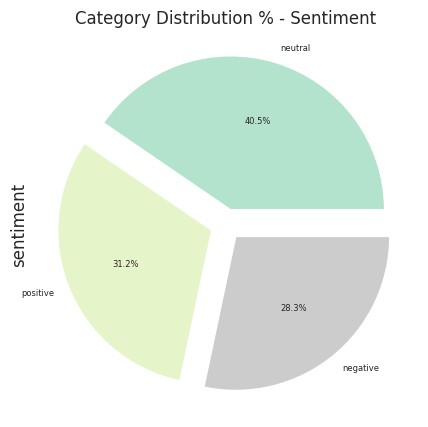

In [ ]:
category_config = pie_chart_config('Category Distribution % - Sentiment', color_map='Pastel2', len_values=3) # category has 3 unique values and we would like to plot all.
dataset['sentiment'].value_counts().plot.pie(**category_config)

**Time of Tweet**

In [ ]:
unique_TOT = dataset['Time of Tweet'].value_counts();
print(unique_TOT)

morning    9161
noon       9160
night      9159
Name: Time of Tweet, dtype: int64


<Axes: title={'center': 'Category Distribution % - Time of Tweet'}, ylabel='Time of Tweet'>

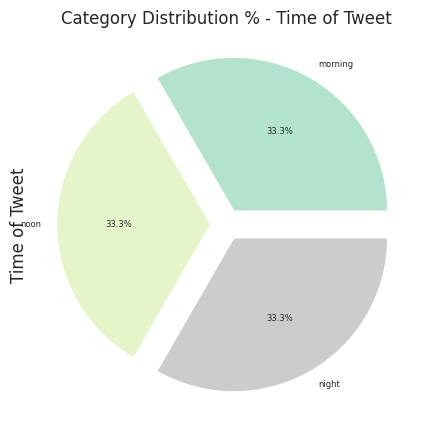

In [ ]:
category_config = pie_chart_config('Category Distribution % - Time of Tweet', color_map='Pastel2', len_values=3) # category has 3 unique values and we would like to plot all.
dataset['Time of Tweet'].value_counts().plot.pie(**category_config)

**Plotting direct relationship between Sentiment and Time of Tweet**

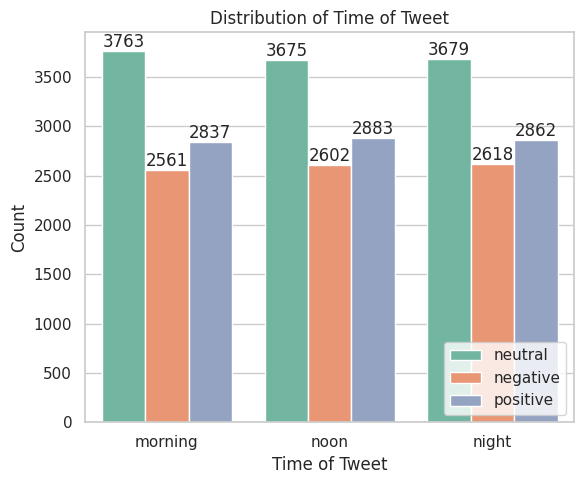

In [ ]:
distribution_graph(dataset['Time of Tweet'], dataset['sentiment'], 'Time of Tweet')

**Age of User**

<Axes: title={'center': 'Category Distribution % - Age of User'}, ylabel='Age of User'>

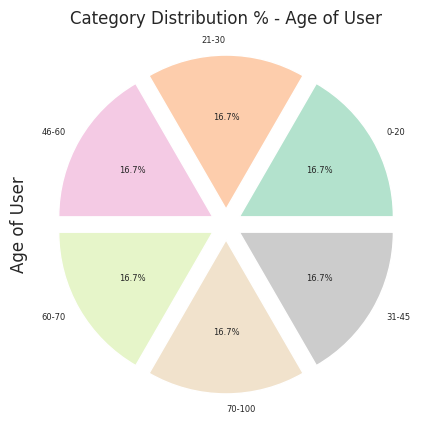

In [ ]:
category_config = pie_chart_config('Category Distribution % - Age of User', color_map='Pastel2', len_values=6) # category has 6 unique values and we would like to plot all.
dataset['Age of User'].value_counts().plot.pie(**category_config)

**Plotting direct relationship between Sentiment and Age of User**

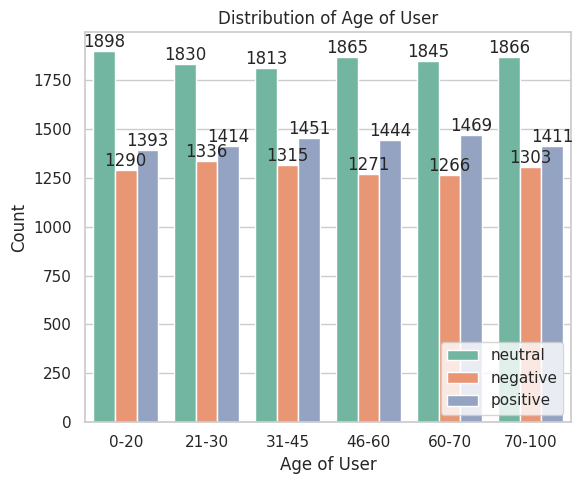

In [ ]:
distribution_graph(dataset['Age of User'], dataset['sentiment'], 'Age of User')

**Country**

In [ ]:
unique_Country = dataset['Country'].value_counts();
unique_Country.sort_index(ascending=True)

Afghanistan    149
Albania        149
Algeria        149
Andorra        149
Angola         149
              ... 
Venezuela      127
Vietnam        127
Yemen          127
Zambia         127
Zimbabwe       127
Name: Country, Length: 195, dtype: int64

<Axes: title={'center': 'Category Distribution % - Country'}, ylabel='Country'>

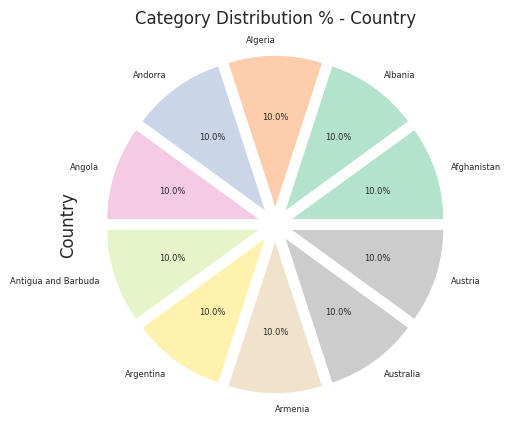

In [ ]:
category_config = pie_chart_config('Category Distribution % - Country', color_map='Pastel2', len_values=10) # category has 3 unique values and we would like to plot all.
dataset['Country'].iloc[:10].value_counts().plot.pie(**category_config)

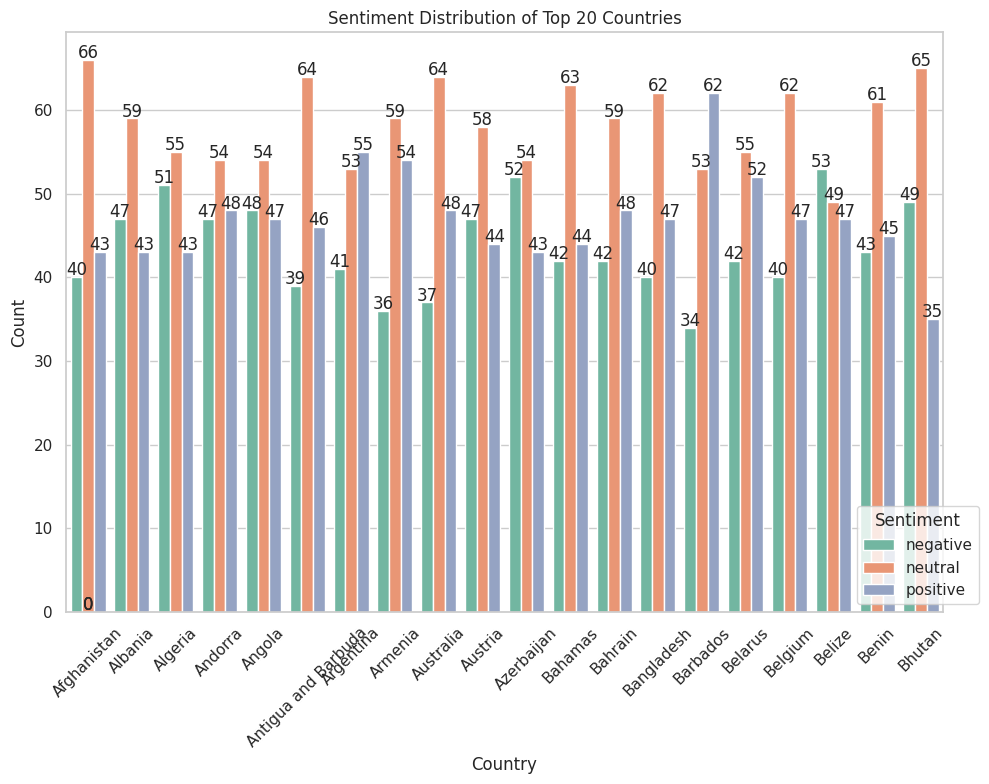

In [ ]:
#Plotting relationship between Top 20 Countries with most Tweets and Sentiment
def plot_sentiment_distribution(dataset):
    # Group the data by country and sentiment, then count the number of tweets for each group
    grouped_data = dataset.groupby(['Country', 'sentiment']).size().reset_index(name='Count')

    # Get the top 20 countries with the highest total number of tweets
    top_countries = grouped_data.groupby('Country')['Count'].sum().nlargest(20).index.tolist()

    # Filter the data to include only the top 20 countries
    top_countries_data = grouped_data[grouped_data['Country'].isin(top_countries)]

    # Plotting
    unique_countries = len(top_countries)
    plot_width = min(max(unique_countries * 0.5, 6), 15)  # Adjust width dynamically
    plot_height = min(max(unique_countries * 0.4, 5), 10)  # Adjust height dynamically
    plt.figure(figsize=(plot_width, plot_height))

    sns.barplot(data=top_countries_data, x='Country', y='Count', hue='sentiment', palette='Set2')
    # Display count values on top of each bar
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.title('Sentiment Distribution of Top 20 Countries')
    plt.xticks(rotation=45)
    for p in plt.gca().patches:
      plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 5),
                       textcoords = 'offset points')
    plt.legend(title='Sentiment')
    # Move legend to bottom right
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 0), loc='lower right')
    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(dataset)

**Checking relationship between Country, Time of Tweet and Sentiment**

In [ ]:
# Step 1: Filter the dataset to include only the top 10 countries based on tweet count
top_countries = dataset['Country'].value_counts().nlargest(10).index
df_filtered = dataset[dataset['Country'].isin(top_countries)]

# Step 2 and 3: Group by 'sentiment' and 'time of tweet', and count occurrences
sentiment_analysis = df_filtered.groupby(['sentiment', 'Time of Tweet']).size().reset_index(name='sum')

# Step 4: Create a DataFrame to store sentiment analysis results
sentiment_analysis_df = pd.DataFrame(sentiment_analysis)

print(sentiment_analysis_df)

  sentiment Time of Tweet  sum
0  negative       morning  140
1  negative         night  178
2  negative          noon  132
3   neutral       morning  181
4   neutral         night  237
5   neutral          noon  172
6  positive       morning  126
7  positive         night  181
8  positive          noon  143


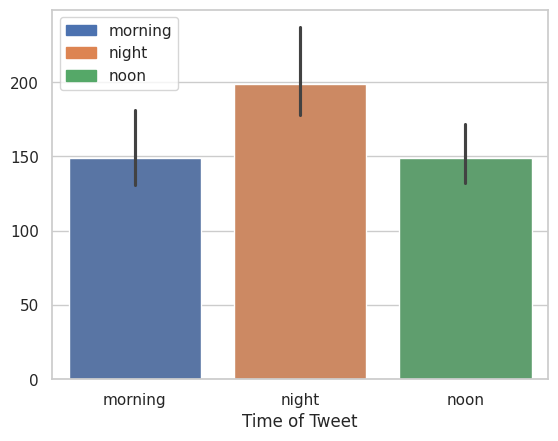

In [ ]:
flights_wide = sentiment_analysis_df.pivot(index="sentiment", columns="Time of Tweet", values="sum")

current_palette = sns.color_palette('colorblind')
plot = sns.barplot(flights_wide, legend = 'auto');
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in plot.get_xticklabels())]
plt.legend(handles=patches, loc="upper left");

# Modeling

In [ ]:
#Drop unwanted columns that are not required for modeling
dataset.drop(columns=['Time of Tweet', 'Age of User', 'Country'], inplace =True)

**Cleaning Data from unwanted symbols and puncuations**

In [ ]:
import re
import string
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

dataset['selected_text'] = dataset["selected_text"].apply(wp)

**Encoding the Sentiment Attribute**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the categories and transform them to numerical values
dataset['sentiment'] = label_encoder.fit_transform(dataset['sentiment'])

In [ ]:
!pip install catboost
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 1.1 MB/s eta 0:00:00


In [ ]:
def Models(models):

    model = models
    X = dataset['selected_text']
    y = dataset['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
    vectorization = TfidfVectorizer()
    XV_train = vectorization.fit_transform(X_train)
    XV_test = vectorization.transform(X_test)
    model.fit(XV_train,y_train)
    y_pred = model.predict(XV_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def cm_plot(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

  cm_display.plot()
  plt.show()

In [ ]:
X = dataset['selected_text']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)
classifiers = [['DecisionTreeClassifier',DecisionTreeClassifier()],
              ['XGBClassifier', XGBClassifier()],
              ['MLPClassifier',MLPClassifier()],
              ['AdaBoostClassifier',AdaBoostClassifier()],
              ['ExtraTreesClassifier',ExtraTreesClassifier()],
              ['GradientBoostingClassifier',GradientBoostingClassifier()],
              ['RandomForestClassifier', RandomForestClassifier()]]
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])
y_predictions={}
for mod in classifiers:
    name = mod[0]
    model = mod[1]
    model.fit(XV_train,y_train)
    y_pred = model.predict(XV_test)
    y_predictions[name]= y_pred
    #f1_scores = f1_score(y_test, y_pred)*100
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(XV_train,y_train)*100
    ATeS = model.score(XV_test,y_test)*100
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

In [ ]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
3,AdaBoostClassifier,0.802675,69.741630,68.977438
5,GradientBoostingClassifier,0.713893,76.232715,74.854440
0,DecisionTreeClassifier,0.623415,99.513282,75.491266
1,XGBClassifier,0.612372,83.833697,79.912664
2,MLPClassifier,0.554524,99.508734,79.949054
6,RandomForestClassifier,0.546425,99.513282,81.277293
4,ExtraTreesClassifier,0.539050,99.513282,82.132460


**Classfication Report & Confusion Matrix (Best 3 Performers**)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1505
           1       0.82      0.78      0.80      2283
           2       0.83      0.82      0.83      1708

    accuracy                           0.80      5496
   macro avg       0.80      0.80      0.80      5496
weighted avg       0.80      0.80      0.80      5496



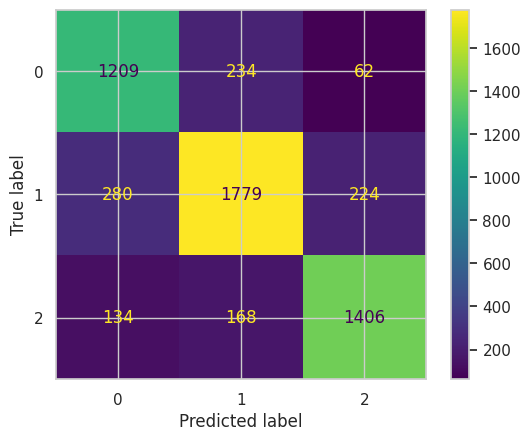

In [ ]:
print(classification_report(y_test, y_predictions['MLPClassifier']))
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions['MLPClassifier']);

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1505
           1       0.78      0.89      0.83      2283
           2       0.90      0.76      0.83      1708

    accuracy                           0.81      5496
   macro avg       0.82      0.80      0.81      5496
weighted avg       0.82      0.81      0.81      5496



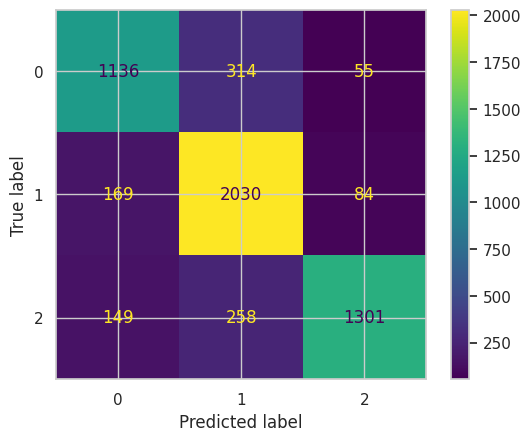

In [ ]:
print(classification_report(y_test, y_predictions['RandomForestClassifier']))
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions['RandomForestClassifier']);

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1505
           1       0.79      0.90      0.84      2283
           2       0.91      0.77      0.83      1708

    accuracy                           0.82      5496
   macro avg       0.83      0.81      0.82      5496
weighted avg       0.83      0.82      0.82      5496



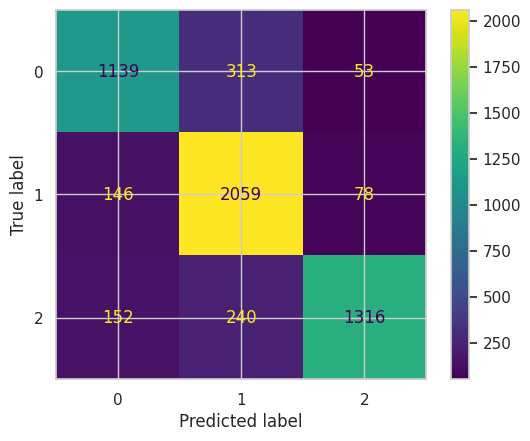

In [ ]:
print(classification_report(y_test, y_predictions['ExtraTreesClassifier']))
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions['ExtraTreesClassifier']);

**Comparing Accuracy Scores**

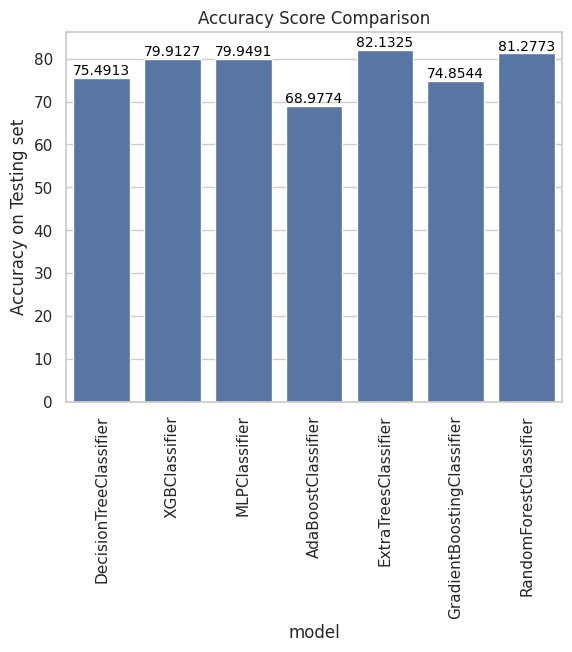

In [ ]:
#Comparing all machine learning algorithm accuracy score by using bar plot.
ax = sns.barplot(data= Acc, x="model", y="Accuracy on Testing set")
ax.set_title('Accuracy Score Comparison')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.4f}'.format(p.get_height()),
        fontsize=10, color='black', ha='center', va='bottom')

**CONCLUSION:** The accuracy score charts reveal that algorithms such as MLP, Random Forest, and ExtraTrees demonstrate comparable performance, while AdaBoost, GradientBoosting, and other models exhibit lower efficacy on this dataset. This underscores the critical importance of selecting an appropriate model for prediction tasks. Notably, Random Forest slightly outperforms others, achieving the highest accuracy score.